In [91]:
%pylab inline
import pandas as pd
import seaborn as sns
import scipy
import skimage


df = pd.read_excel("C:/Users/Jirik/data/medical/processed/SA_experiments.xlsx")
df = pd.read_excel("C:/Users/Jirik/data/medical/processed/metacentrum/SA_experiments.xlsx")
df

Populating the interactive namespace from numpy and matplotlib


,Annotation Color,Annotation Details,Annotation ID,Annotation Title,Area,Area unit,Branch number,Central Vein Dice,Central Vein Jaccard,Central vein area,...,Processing;Skeleton Analysis;Working Resolution,Processing;Texture Analysis;GLCM Levels,Processing;Texture Analysis;Tile Size,Processing;Texture Analysis;Tile Spacing,Processing;Texture Analysis;Working Resolution,Scaffan Version,Skeleton length,platform.node,platform.processor,platform.system
0,#00FF00,PFCVI=1 SNI=0 SWP=0,1,NaN,0.681016,mm,7686.0,1.000000,1.000000,0.008066,...,9.100000e-07,64,64,32,4.000000e-07,0.11.0,15.85402,elmo5-13.hw.elixir-czech.cz,NaN,Linux
1,#00FF00,PFCVI=1 SNI=0 SWP=0,2,NaN,0.968983,mm,7648.0,1.000000,1.000000,0.005598,...,9.100000e-07,64,64,32,4.000000e-07,0.11.0,14.98133,elmo5-13.hw.elixir-czech.cz,NaN,Linux
2,#00FF00,PFCVI=1 SNI=0 SWP=0,6,NaN,1.192457,mm,5387.0,1.000000,1.000000,0.002716,...,9.100000e-07,64,64,32,4.000000e-07,0.11.0,10.14741,elmo5-13.hw.elixir-czech.cz,NaN,Linux
3,#00FF00,PFCVI=1 SNI=0 SWP=0,9,NaN,1.756423,mm,12800.0,1.000000,1.000000,0.026787,...,9.100000e-07,64,64,32,4.000000e-07,0.11.0,25.96321,elmo5-13.hw.elixir-czech.cz,NaN,Linux
4,#00FF00,PFCVI=1 SNI=0 SWP=0,10,NaN,1.011402,mm,9243.0,1.000000,1.000000,0.000162,...,9.100000e-07,64,64,32,4.000000e-07,0.11.0,17.64581,elmo5-13.hw.elixir-czech.cz,NaN,Linux
5,#00FF00,PFCVI=1 SNI=0 SWP=0,1,NaN,1.577474,mm,NaN,0.119954,0.063804,0.122824,...,9.100000e-07,64,64,32,4.000000e-07,0.11.0,NaN,elmo5-12.hw.elixir-czech.cz,NaN,Linux
6,#00FF00,PFCVI=1 SNI=0 SWP=0,2,NaN,1.040017,mm,NaN,0.076893,0.039984,0.140005,...,9.100000e-07,64,64,32,4.000000e-07,0.11.0,NaN,elmo5-12.hw.elixir-czech.cz,NaN,Linux
7,#00FF00,PFCVI=1 SNI=0 SWP=0,6,NaN,1.192378,mm,NaN,0.037776,0.019252,0.141088,...,9.100000e-07,64,64,32,4.000000e-07,0.11.0,NaN,elmo5-12.hw.elixir-czech.cz,NaN,Linux
8,#00FF00,PFCVI=1 SNI=0 SWP=0,9,NaN,1.527437,mm,NaN,0.151715,0.082084,0.317301,...,9.100000e-07,64,64,32,4.000000e-07,0.11.0,NaN,elmo5-12.hw.elixir-czech.cz,NaN,Linux
9,#00FF00,PFCVI=1 SNI=0 SWP=0,10,NaN,0.970199,mm,NaN,0.011015,0.005538,0.023293,...,9.100000e-07,64,64,32,4.000000e-07,0.11.0,NaN,elmo5-12.hw.elixir-czech.cz,NaN,Linux


In [92]:
def get_col_from_ann_details(df, colname):
    df[f"{colname}"] = pd.to_numeric(df["Annotation Details"].str.extract(f'{colname}=(\d*)')[0])
    return df
get_col_from_ann_details(df, "PFCVI")
get_col_from_ann_details(df, "SNI")
get_col_from_ann_details(df, "SWP");

df["Sum Semi-q"] = df["PFCVI"] + df["SNI"] + df["SWP"]

In [93]:
df.keys()

Index(['Annotation Color', 'Annotation Details', 'Annotation ID',
       'Annotation Title', 'Area', 'Area unit', 'Branch number',
       'Central Vein Dice', 'Central Vein Jaccard', 'Central vein area',
       'Datetime', 'Dead ends number', 'Experiment Datetime',
       'Experiment Title', 'File Name', 'File Path', 'GLCM Correlation',
       'GLCM Energy', 'GLCM Homogenity', 'Input;Data Info', 'Input;File Path',
       'Lobulus Border Dice', 'Lobulus Border Jaccard', 'Output image size 0',
       'Output image size 1', 'Output pixel size 0', 'Output pixel size 1',
       'Output;Common Spreadsheet File', 'Output;Directory Path',
       'Processing Time [s]',
       'Processing;Lobulus Segmentation;Annotation Margin',
       'Processing;Lobulus Segmentation;Border Segmentation;Iterations',
       'Processing;Lobulus Segmentation;Border Segmentation;Lambda1',
       'Processing;Lobulus Segmentation;Border Segmentation;Lambda2',
       'Processing;Lobulus Segmentation;Border Segmentatio

# Lobulus Structure Analysis

In [94]:
dfcor = df[["Branch number", "GLCM Energy", "GLCM Homogenity", "GLCM Correlation", "Skeleton length", "PFCVI", "SNI", "SWP", "Sum Semi-q"]]
dfcor

,Branch number,GLCM Energy,GLCM Homogenity,GLCM Correlation,Skeleton length,PFCVI,SNI,SWP,Sum Semi-q
0,7686.0,0.822623,0.916569,0.672097,15.85402,1,0,0,1
1,7648.0,0.807898,0.911466,0.597712,14.98133,1,0,0,1
2,5387.0,0.861441,0.938972,0.512141,10.14741,1,0,0,1
3,12800.0,0.850319,0.930178,0.566942,25.96321,1,0,0,1
4,9243.0,0.770913,0.900913,0.654881,17.64581,1,0,0,1
5,NaN,NaN,NaN,NaN,NaN,1,0,0,1
6,NaN,NaN,NaN,NaN,NaN,1,0,0,1
7,NaN,NaN,NaN,NaN,NaN,1,0,0,1
8,NaN,NaN,NaN,NaN,NaN,1,0,0,1
9,NaN,NaN,NaN,NaN,NaN,1,0,0,1


## Correlation analysis

In [95]:
# ### Pearson correlation coefficient

# Absolute Pearson Correlation - usefull for linear



In [96]:
# cm = sns.light_palette("green", as_cmap=True)
# dfcor.corr('pearson').abs().style.background_gradient(cmap=cm, low=0, high=1)

### Spearman correlation coefficient

Absolute Spearman Correlation 

In [97]:
# cm =sns.color_palette("coolwarm", 7, as_cmap=True)
cm = sns.light_palette("green", as_cmap=True)
# cm = sns.light_palette("green", as_cmap=True)
dfcor.corr('spearman').abs().style.background_gradient(cmap=cm, low=0, high=1)
# dfcor.corr('spearman').abs()[:5][["PFCVI", "SNI", "SWP", "Sum Semi-q"]].style.background_gradient(cmap=cm, low=0, high=1)

,Branch number,GLCM Energy,GLCM Homogenity,GLCM Correlation,Skeleton length,PFCVI,SNI,SWP,Sum Semi-q
Branch number,1,0.346923,0.433846,0.234615,0.983077,0.0577813,0.107182,0.147904,0.0160329
GLCM Energy,0.346923,1,0.754615,0.449231,0.413077,0.254238,0.590765,0.325226,0.455333
GLCM Homogenity,0.433846,0.754615,1,0.172308,0.499231,0.300463,0.616083,0.374255,0.495416
GLCM Correlation,0.234615,0.449231,0.172308,1,0.299231,0.543144,0.362898,0.33258,0.412446
Skeleton length,0.983077,0.413077,0.499231,0.299231,1,0.0115563,0.203392,0.0645549,0.0753545
PFCVI,0.0577813,0.254238,0.300463,0.543144,0.0115563,1,0.684653,0.883883,0.86711
SNI,0.107182,0.590765,0.616083,0.362898,0.203392,0.684653,1,0.887559,0.949871
SWP,0.147904,0.325226,0.374255,0.33258,0.0645549,0.883883,0.887559,1,0.981023
Sum Semi-q,0.0160329,0.455333,0.495416,0.412446,0.0753545,0.86711,0.949871,0.981023,1


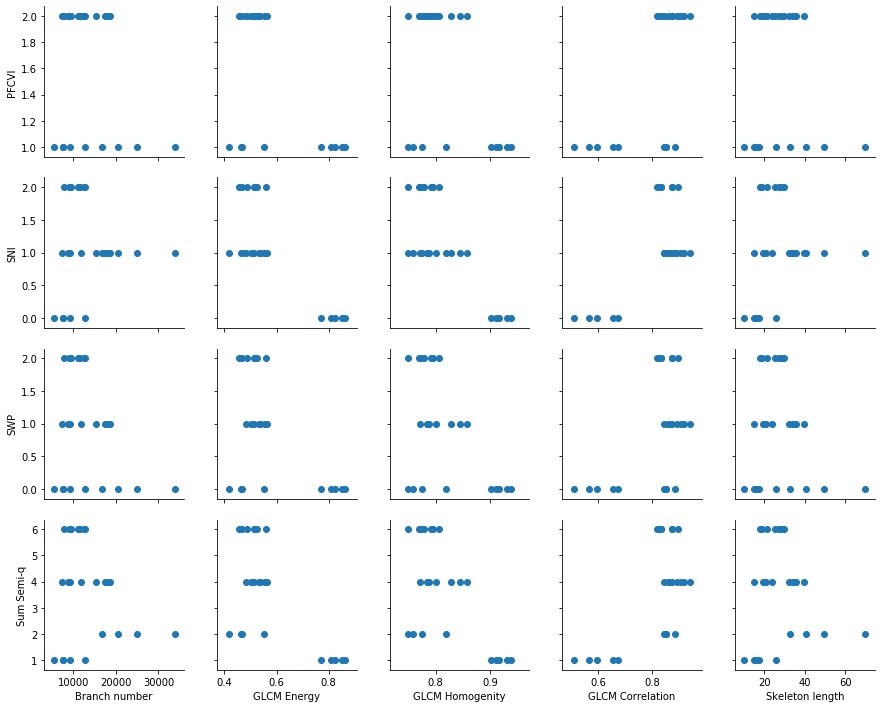

In [101]:
# iris = sns.load_dataset("iris")
g = sns.PairGrid(df, x_vars=["Branch number", "GLCM Energy", "GLCM Homogenity", "GLCM Correlation", "Skeleton length"], y_vars=["PFCVI", "SNI", "SWP", "Sum Semi-q"])
g.map(plt.scatter);

In [100]:
df[["Branch number", "GLCM Energy", "GLCM Homogenity", "GLCM Correlation"]].corrwith(df[["Skeleton length", "PFCVI", "SNI", "SWP", "Sum Semi-q"]])

Branch number      NaN
GLCM Correlation   NaN
GLCM Energy        NaN
GLCM Homogenity    NaN
PFCVI              NaN
SNI                NaN
SWP                NaN
Skeleton length    NaN
Sum Semi-q         NaN
dtype: float64